In [2]:
import os 
import matplotlib.pyplot as plt 
import numpy as np 

TODO : 

- Encode each predicat features into a concise representation 
- Invesigate MixUp augmentation

In [16]:
file_path = '../CUB/CUB_200_2011/attributes/attributes.txt' 

att_pred = {}


with open(file_path, 'r') as f : 
    lines = f.readlines()
    for line in lines : 
        line = line.strip().split(' ')
        pred, instance = line[1].split('::')
        if not (pred in att_pred) :  
            att_pred[pred] = []
        att_pred[pred].append(instance)

In [17]:
for pred in att_pred : 
    print(pred, " : ", att_pred[pred])

has_bill_shape  :  ['curved_(up_or_down)', 'dagger', 'hooked', 'needle', 'hooked_seabird', 'spatulate', 'all-purpose', 'cone', 'specialized']
has_wing_color  :  ['blue', 'brown', 'iridescent', 'purple', 'rufous', 'grey', 'yellow', 'olive', 'green', 'pink', 'orange', 'black', 'white', 'red', 'buff']
has_upperparts_color  :  ['blue', 'brown', 'iridescent', 'purple', 'rufous', 'grey', 'yellow', 'olive', 'green', 'pink', 'orange', 'black', 'white', 'red', 'buff']
has_underparts_color  :  ['blue', 'brown', 'iridescent', 'purple', 'rufous', 'grey', 'yellow', 'olive', 'green', 'pink', 'orange', 'black', 'white', 'red', 'buff']
has_breast_pattern  :  ['solid', 'spotted', 'striped', 'multi-colored']
has_back_color  :  ['blue', 'brown', 'iridescent', 'purple', 'rufous', 'grey', 'yellow', 'olive', 'green', 'pink', 'orange', 'black', 'white', 'red', 'buff']
has_tail_shape  :  ['forked_tail', 'rounded_tail', 'notched_tail', 'fan-shaped_tail', 'pointed_tail', 'squared_tail']
has_upper_tail_color  : 

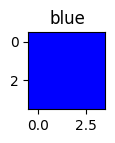

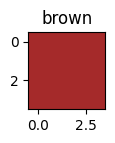

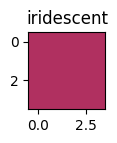

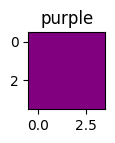

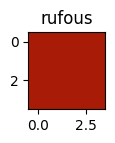

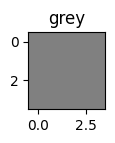

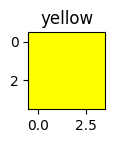

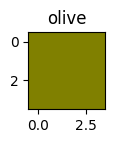

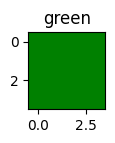

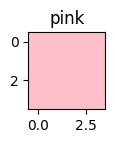

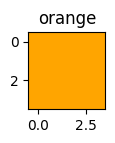

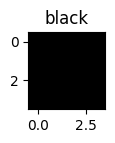

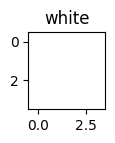

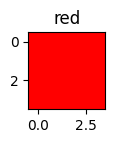

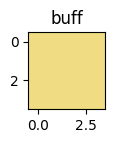

In [27]:
color_mapping = {
    'blue': (0, 0, 255),
    'brown': (165, 42, 42),
    'iridescent': (176, 48, 96),  # Example RGB value, replace with actual if available
    'purple': (128, 0, 128),
    'rufous': (168, 28, 7),  # Example RGB value, replace with actual if available
    'grey': (128, 128, 128),
    'yellow': (255, 255, 0),
    'olive': (128, 128, 0),
    'green': (0, 128, 0),
    'pink': (255, 192, 203),
    'orange': (255, 165, 0),
    'black': (0, 0, 0),
    'white': (255, 255, 255),
    'red': (255, 0, 0),
    'buff': (240, 220, 130)  # Example RGB value, replace with actual if available
}


for c in color_mapping : 
    I = np.ones((4, 4, 3))
    for k in range(3) : 
        I[:, :, k] = color_mapping[c][k]*I[:, :, k]
        
    plt.figure(figsize=(1, 1))
    plt.imshow(I.astype(int))
    plt.title(c)
    plt.show()
    

In [28]:
ds_path = '../CUB/CUB_200_2011/'

attributes_file = []

n = 0
with open(ds_path+'attributes/image_attribute_labels_clean.txt', 'r') as f : 
    lines = f.readlines()
    for line in lines : 
        try : 
            line = np.array(line.strip().split(' ')).astype(float)
            attributes_file.append(line)
        except : 
            n+=1 
            attributes_file.append([])
        
attributes_file = np.array(attributes_file)

In [31]:
ds_labels = []
with open(ds_path+'image_class_labels.txt', 'r') as f : 
    lines = f.readlines()
    for line in lines : 
        line = line.strip().split(' ')
        ds_labels.append(int(line[1]))
        
ds_labels = np.array(ds_labels)

In [71]:
attributes_labels = []
for i in range(len(attributes_file)//312) : 
    slice = attributes_file[312*i:312*(i+1), 2:4]
    vector = slice[:, 0]
    attributes_labels.append(vector)

    
attributes_labels = np.array(attributes_labels)

c:\RoboDK\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\RoboDK\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


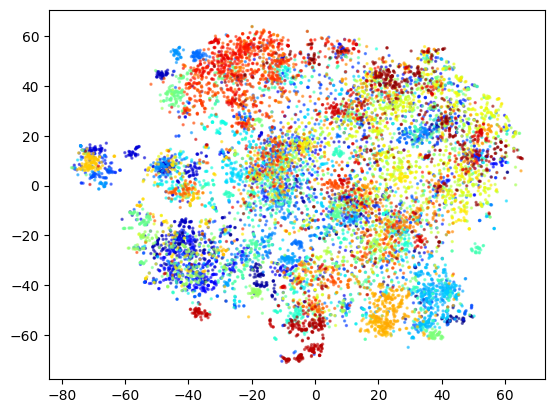

In [72]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_f = tsne.fit_transform(attributes_labels)

plt.scatter(X_f[:, 0], X_f[:, 1], c=ds_labels, s=2, alpha=0.5, cmap='jet')
plt.show()

In [73]:
vector

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

<h3>Compressing semantic features</h3>

In [40]:
file_path = '../CUB/CUB_200_2011/attributes/attributes.txt' 

att_id = {}
pred_id = {}
new_att = {}

preds = []

with open(file_path, 'r') as f : 
    lines = f.readlines()
    i = 0 
    for line in lines : 
        line = line.strip().split(' ')
        idx = int(line[0])
        pred, instance = line[1].split('::')
        att_id[idx] = line[1]
        if not (pred in preds) :  
            preds.append(pred)
            pred_id[i] = pred
            i+=1
            
        new_att[idx] = i-1

In [66]:
vec_indexes = []

for i in pred_id : 
    if 'color' in pred_id[i] : 
        vec_indexes += [i]*3
    else : 
        vec_indexes += [i]*len(att_pred[pred_id[i]])
        
vec_indexes = np.array(vec_indexes)
len(vec_indexes)

121

In [61]:
def encode_attributes(att, vec_indexes, pred_id, new_att, att_id) : 
    
    v = np.zeros(len(vec_indexes)) 
    for att_idx in att : 
        pred = new_att[att_idx] 
        att_name = att_id[att_idx].split('::')[1]
        pred_name = pred_id[pred] 
        if 'color' in pred_name : 
            v[vec_indexes==pred] = np.array(list(color_mapping[att_name]))
        else : 
            mini_v = np.zeros(len(att_pred[pred_name]))  
            idd = np.where(np.array(att_pred[pred_name])==att_name)[0] 
            mini_v[idd] = 1
            v[vec_indexes==pred] = mini_v
    return v 

In [67]:
compressed_labels = []

for i in range(len(attributes_labels)) : 
    att = np.where(attributes_labels[i]==1)[0]+1 
    v = encode_attributes(att, vec_indexes, pred_id, new_att, att_id)
    compressed_labels.append(v)

compressed_labels = np.array(compressed_labels)
compressed_labels.shape

(11788, 121)

c:\RoboDK\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\RoboDK\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


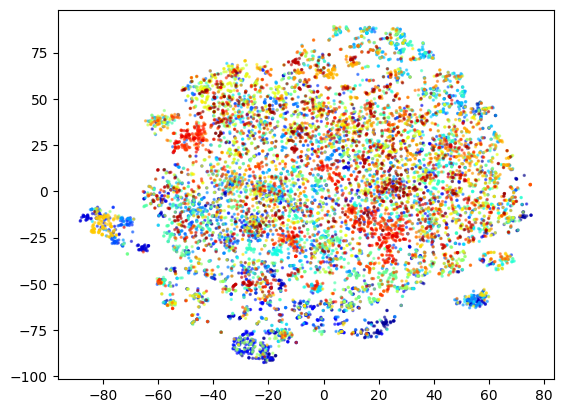

In [68]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_f = tsne.fit_transform(compressed_labels)

plt.scatter(X_f[:, 0], X_f[:, 1], c=ds_labels, s=2, alpha=0.5, cmap='jet')
plt.show()

In [ ]:
import rdflib
from rdflib import Graph, URIRef, Literal, Namespace, RDF, RDFS
from rdflib.namespace import XSD
# from pyvis.network import Network

g = rdflib.Graph()

# Definition d'un espace de noms
cs = Namespace('http://www.centralesupelec.fr/krr/')
# Association dans le graphe
g.bind('cs', cs)

In [ ]:
for pred in att_pred : 
    print(pred, " : ", att_pred[pred])

has_bill_shape  :  ['curved_(up_or_down)', 'dagger', 'hooked', 'needle', 'hooked_seabird', 'spatulate', 'all-purpose', 'cone', 'specialized']
has_wing_color  :  ['blue', 'brown', 'iridescent', 'purple', 'rufous', 'grey', 'yellow', 'olive', 'green', 'pink', 'orange', 'black', 'white', 'red', 'buff']
has_upperparts_color  :  ['blue', 'brown', 'iridescent', 'purple', 'rufous', 'grey', 'yellow', 'olive', 'green', 'pink', 'orange', 'black', 'white', 'red', 'buff']
has_underparts_color  :  ['blue', 'brown', 'iridescent', 'purple', 'rufous', 'grey', 'yellow', 'olive', 'green', 'pink', 'orange', 'black', 'white', 'red', 'buff']
has_breast_pattern  :  ['solid', 'spotted', 'striped', 'multi-colored']
has_back_color  :  ['blue', 'brown', 'iridescent', 'purple', 'rufous', 'grey', 'yellow', 'olive', 'green', 'pink', 'orange', 'black', 'white', 'red', 'buff']
has_tail_shape  :  ['forked_tail', 'rounded_tail', 'notched_tail', 'fan-shaped_tail', 'pointed_tail', 'squared_tail']
has_upper_tail_color  : 

In [ ]:
bird = cs.Black_footed_Albatross 
a1 = cs.has_Bill_Shape 

In [ ]:
g.add((cs.Black_footed_Albatross , cs.has_Bill_Shape , Literal("hooked")))
g.add((cs.Black_footed_Albatross , cs.has_Wing_Color , Literal("white")))
g.add((cs.Black_footed_Albatross , cs.has_Breast_Pattern , Literal("spotted")))
g.add((cs.Black_footed_Albatross , cs.has_Size , Literal("large_(16_-_32_in)")))

<Graph identifier=N3514bd11583c4970bc8e8d67cc177dc2 (<class 'rdflib.graph.Graph'>)>

In [ ]:
print(g.serialize(format='turtle'))

In [ ]:
from pyvis.network import Network
# Create PyVis Network
def pyvis_network(g):
    net = Network(notebook=True)
    
    # Add nodes and edges
    for subj, pred, obj in g:
        subj_id = str(subj) if isinstance(subj, BNode) else subj.split('/')[-1]
        obj_id = str(obj) if isinstance(obj, BNode) else obj.split('/')[-1]
    
        net.add_node(subj_id, label=subj_id)
        net.add_node(obj_id, label=obj_id)
        net.add_edge(subj_id, obj_id, title=pred.split('/')[-1])
    return net

In [ ]:
# Needed for pyvis to work
from rdflib import BNode
# Show the graph
pyvis_network(g).show("rdf_graph.html")

rdf_graph.html
